#Detecção de Anomalias pelo Z Score e Z Score Modificado

No estudo a seguir, serão analisado dois casos para detecção de anomalias ou valores atípicos (outliers) utilizando métodos estatísticos. Para os casos a seguir, serão utilizados os métodos de detecção pelo Z Score e pelo Z Score Modificado.


**1º Caso -** Participação dos alunos no exame educacional SAT nos Estados Unidos aplicado a estudantes do ensino médio no ano de 2012. A prova serve de critério para admissão nas universidades norte-americanas. Aqui serão avaliados as escolas cujos alunos tiveram o menor indice de participação.



**2º Caso -** Determinar quais foram os jogadores que mais fizeram gols na Copa do Mundo entre 1930 e 2018.


Todos os dados foram limpos e salvos como um CSV.

#Instalação do backend e importação das bibliotecas a serem utilizadas:

In [3]:
%matplotlib inline

import sys
import scipy
import scipy.stats as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random 

##1º Parte - Carregamento do conjuntos de dados
Importação e impressão dos dados para o **1º caso**:

In [4]:
ct_test = pd.read_csv('SAT_CT_District_Participation_2012.csv')
print(ct_test.shape)
ct_test.tail()

(130, 2)


,District,Participation Rate
125,Stamford Academy,0.28
126,Connecticut Technical High School System,0.49
127,Norwich Free Academy,0.70
128,The Gilbert School,0.71
129,Woodstock Academy,0.76


##Análise das características fundamentais:
Após o carregamento dos dados, pode-se calcular valores como a média, desvio padrão e o Z Score. Todos esses valores derivam de análises estatísticas e por meio delas será possível detectar as anomalias.

In [5]:
mean_rate = ct_test['Participation Rate'].mean()
stedv_rate = ct_test['Participation Rate'].std(ddof=0)
zscore_rate = ss.zscore(ct_test['Participation Rate'], ddof=0)

print('Média de participação: {:.3f}'.format(mean_rate))
print('Desvio Padrão: {:.3f}'.format(stedv_rate))
ct_test = ct_test.assign(zscore=zscore_rate)
ct_test.tail()

Média de participação: 0.741
Desvio Padrão: 0.136


,District,Participation Rate,zscore
125,Stamford Academy,0.28,-3.395374
126,Connecticut Technical High School System,0.49,-1.847124
127,Norwich Free Academy,0.70,-0.298875
128,The Gilbert School,0.71,-0.225148
129,Woodstock Academy,0.76,0.143482


##Construção do gráfico
Agora, o gráfico relacionando o Z Score por escola é traçado para que possamos visualmente identificar as anomalias. 

Pelo estudo em estatística, sabe-se que 95% dos valores em uma distribuição normal se encontram a uma distancia de duas vezes o Z Score em relação a média. 

Como se quer os menores valores, será utilizado um Z Score negativo como referencia para delimitar o que serão considerados anomalias.

In [23]:
def plot_anomaly(score_data, threshold):
  score_data = score_data.copy().sort_values(ascending=False).values
  ranks = np.linspace(1, len(score_data), len(score_data))
  mask_outlier = (score_data < threshold)

  plt.figure(dpi=150)
  plt.plot(ranks[~mask_outlier], score_data[~mask_outlier], 'o', color='b', label='Escolas Dentro do Padrão')
  plt.plot(ranks[mask_outlier], score_data[mask_outlier], 'o', color='r', label='Anomalias')
  plt.axhline(threshold, color='r', label='Limite', alpha=0.5)
  plt.legend(loc = 'lower left')
  plt.title('Z-Score x Escolas')
  plt.xlabel('Escolas')
  plt.ylabel('Z-Score')
  plt.show()

  

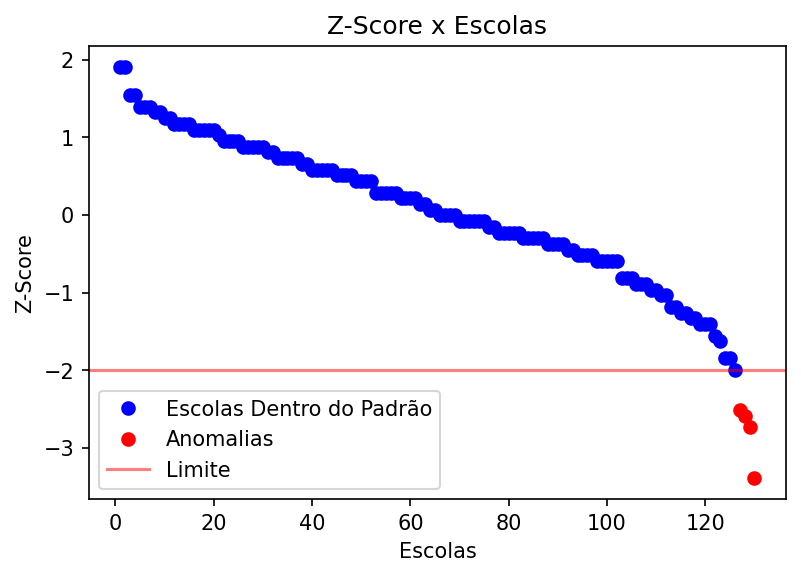

In [24]:
  plot_anomaly(ct_test['zscore'], -2)

##Lista de escolas abaixo do limite
Com o intuito de ver o nome das escolas que ficaram abaixo do Z Score estimado, é impresso na tela uma tabela contendo o nome delas.


In [7]:
zscore_anomalies = ct_test[(ct_test['zscore'] < -2)]
zscore_anomalies

,District,Participation Rate,zscore
50,New Britain,0.40,-2.510660
99,Windham,0.37,-2.731839
121,Eastern Connecticut Regional Educational Servi...,0.39,-2.584386
125,Stamford Academy,0.28,-3.395374


##Observações
É interessante verificar que mesmo que o conjunto de dados original não possa ser modelado por uma função Gaussiana, o Z Score ainda sim pode ser utilizado para avaliar discrepâncias e anomalias.


##Construção do histograma
A partir do histograma poderemos verificar que o cojunto de dados não segue o modelo de distribuição normal.

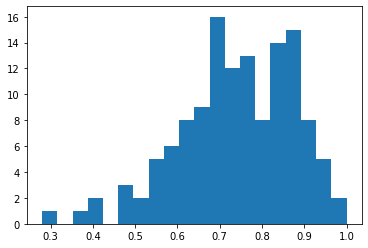

In [8]:
nbins=20
n_hist, bins_hist, patches_hist = plt.hist(ct_test['Participation Rate'], nbins, density=False, cumulative=False, linewidth=1.0, label='data')

##Construção de gráfico de função de distribuição acumulada

Agora, será comparado a função de distribuição acumulada dos dados com a da distribuição normal utilizando a mesma média e desvio padrão:

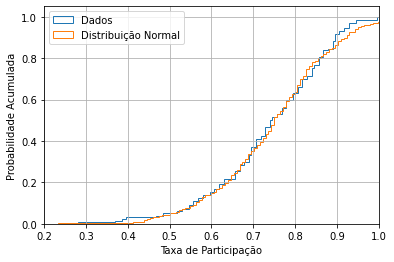

In [9]:
num_bins=130
normal_dist =[random.gauss(mean_rate, stedv_rate) for _ in range (500)]
n, bins, patches = plt.hist(ct_test['Participation Rate'], num_bins, density = True, histtype = 'step', cumulative=True, linewidth = 1.0, label = 'Dados')
plt.hist(normal_dist, num_bins, density = True, histtype = 'step', cumulative = True, linewidth = 1.0, label = 'Distribuição Normal')
plt.grid(True)
plt.legend(loc = 'upper left')
axes = plt.gca()
axes.set_xlim([0.2,1.0])
plt.xlabel('Taxa de Participação')
plt.ylabel('Probabilidade Acumulada')
plt.show()

##Conclusão da primeira parte
Embora nossos dados sejam inconsistentes com uma distribuição normal, o Z Score nos ajudou a identificar discrepâncias. 

Portanto, embora não possamos fazer nenhuma afirmação probabilística com base nos escores z, podemos focar com segurança nossas quatro escolas.

##2º Parte - Carregamento do conjuntos de dados
Importação e impressão dos dados para o **2º caso**:

In [10]:
top_goals = pd.read_csv('world_cup_top_goal_scorers.csv', encoding = 'utf-8', names = ['Year', 'Player(s)', 'Goals'], skiprows = 1)
top_goals.head()

,Year,Player(s),Goals
0,1930,Guillermo Stábile,8
1,1934,Oldřich Nejedlý,5
2,1938,Leônidas,7
3,1950,Ademir,8
4,1954,Sándor Kocsis,11


##Análise das características fundamentais:
Após o carregamento dos dados, pode-se calcular valores como a média, desvio padrão e o Z Score.

In [11]:
mean_goals = top_goals['Goals'].mean()
stdev_goals = top_goals['Goals'].std(ddof = 0)
zscore_goals = ss.zscore(top_goals['Goals'], ddof = 0)

print('Média de número de gols: {:.2f}'.format(mean_goals))
print('Desvio Padrão: {:.2f}'.format(stedv_rate))
top_goals = top_goals.assign(zscore = zscore_goals)
top_goals.head()

Média de número de gols: 7.05
Desvio Padrão: 0.14


,Year,Player(s),Goals,zscore
0,1930,Guillermo Stábile,8,0.443242
1,1934,Oldřich Nejedlý,5,-0.952971
2,1938,Leônidas,7,-0.022162
3,1950,Ademir,8,0.443242
4,1954,Sándor Kocsis,11,1.839455


##Construção do gráfico
Agora, o gráfico relacionando o Z Score por jogadores é traçado para que possamos visualmente identificar as anomalias. 

Novamente, pelo estudo em estatística, sabe-se que 95% dos valores em uma distribuição normal se encontram a uma distancia de duas vezes o Z Score em relação a média. 

No entanto, como dessa vez se quer os maiores valores , será utilizado um Z Score positivo como referencia para delimitar o que serão considerados anomalias.

In [12]:
def plot_anomaly_goals (score_data, threshold):
  score_data = score_data.copy().sort_values(ascending = False).values
  ranks = np.linspace(1, len(score_data), len(score_data))
  mask_outlier = (score_data > threshold)

  plt.figure (dpi = 150)
  plt.plot (ranks[~mask_outlier], score_data[~mask_outlier], 'o', color = 'b', label = 'Jogador Típico')
  plt.plot (ranks[mask_outlier], score_data[mask_outlier], 'o', color = 'r', label = 'Anomalia')
  plt.axhline (threshold, color = 'r', label = 'Limite', alpha = 0.5)
  plt.legend (loc = 'upper right')
  plt.title ('Z-Score x Jogador', fontweight = 'bold')
  plt.xticks (np.arange(0, 21, step = 2.0))
  plt.xlabel ('Jogador')
  plt.ylabel ('Z-Score')
  plt.show()

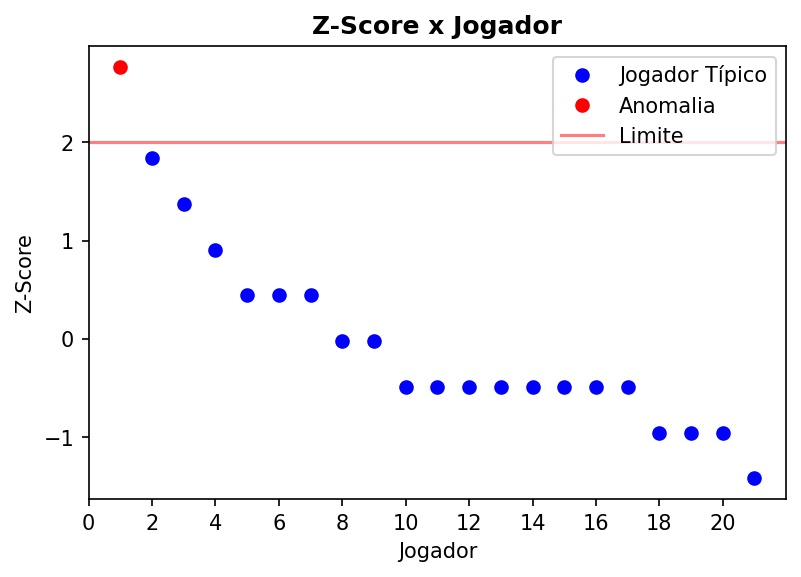

In [13]:
plot_anomaly_goals(top_goals['zscore'], 2)

##Lista de jogadores acima do limite
Com o intuito de ver quais jogadores que ficaram acima do Z Score estimado, é impresso na tela uma tabela contendo o nome deles.

In [14]:
zscore_anomalies_players = top_goals[(top_goals['zscore'] > 2)]
zscore_anomalies_players

,Year,Player(s),Goals,zscore
5,1958,Just Fontaine,13,2.770264


##Observações
O jogador selecionado anteriormente fez tantos gols que alterou significativamente a média e o desvio padrão dos dados.

Portanto, será usado o Z-Score Modificado para uma nova análise.

A diferença entre Z Score e o Z Score Modificado é que o primeiro usa a média para calcular seu valor enquanto o segundo usa a mediana. Logo, para próxima etapa, será necessário calcular a mediana primeiro:

In [25]:
median_goals = np.median(top_goals['Goals'])
median_goals

6.0

##Função para cálculo do Z-Score Modificado

In [16]:
def modified_zscore (data, consistency_correction = 1.4826):
  median = np.median(data)
  deviation_from_med = np.array(data) - median
  mad = np.median(np.abs(deviation_from_med))
  mod_zscore = deviation_from_med/(consistency_correction)
  return mod_zscore, mad

##Impressão dos dados com o Z-Score Modificado
Após o calculo no Z Score Modificado é possivel imprimir na tela uma tabela com ambos os valores para poder se comparar as diferenças.

In [17]:
mod_zscore_goals, mad_goals = modified_zscore(top_goals['Goals'])
top_goals = top_goals.assign(mod_zscore = mod_zscore_goals)
top_goals.head()

,Year,Player(s),Goals,zscore,mod_zscore
0,1930,Guillermo Stábile,8,0.443242,1.348982
1,1934,Oldřich Nejedlý,5,-0.952971,-0.674491
2,1938,Leônidas,7,-0.022162,0.674491
3,1950,Ademir,8,0.443242,1.348982
4,1954,Sándor Kocsis,11,1.839455,3.372454


##Construção do gráfico
Agora, o gráfico relacionando o Z Score Modificado por jogadores é traçado para que possamos visualmente identificar as anomalias.

Dessa vez, será utilizado uma valor de duas vezes o Z Score Modificado para traçar uma linha e separar as anomalias dos demais dados.

In [18]:
def plot_anomaly_goals_2 (score_data, threshold):
  score_data = score_data.copy().sort_values(ascending = False).values
  ranks = np.linspace(1, len(score_data), len(score_data))
  mask_outliers = (score_data > threshold)

  plt.figure (dpi = 150)
  plt.plot (ranks[~mask_outliers], score_data[~mask_outliers], 'o', color = 'b', label = 'Jogador Típico')
  plt.plot (ranks[mask_outliers], score_data[mask_outliers], 'o', color = 'r', label = 'Anomalia')
  plt.axhline (threshold, color = 'r', label = 'Limite', alpha = 0.5)
  plt.legend (loc = 'upper right')
  plt.title ('Z-Score Modificado x Jogadores', fontweight = 'bold')
  plt.xticks (np.arange(0, 21, step = 2.0))
  plt.xlabel('Jogador')
  plt.ylabel('Z-Score Modificado')
  plt.show()

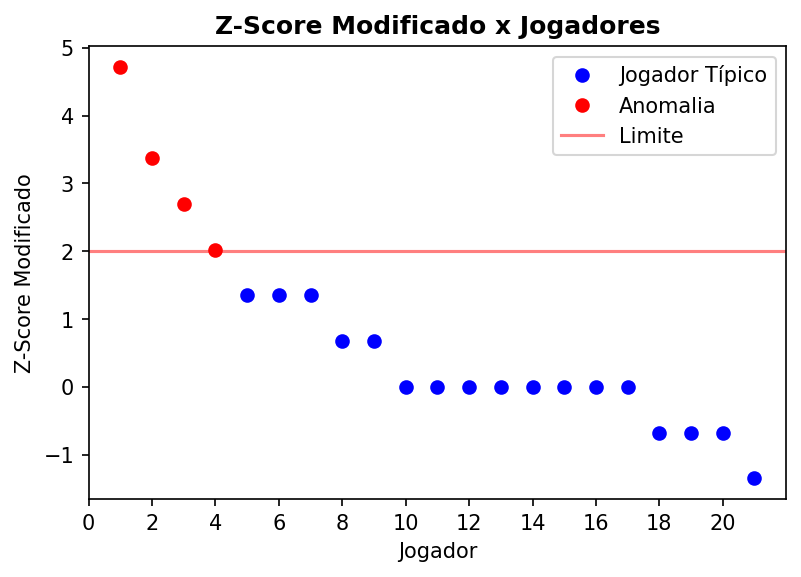

In [19]:
plot_anomaly_goals_2(top_goals['mod_zscore'], 2)

##Lista de jogadores acima do limite
Com o intuito de verificar quais jogadores que ficaram acima do Z Score Modificado estimado, é impresso na tela uma tabela contendo o nome de cada um.

In [20]:
mod_zscore_anomalies_players = top_goals[(top_goals['mod_zscore'] > 2)]
mod_zscore_anomalies_players

,Year,Player(s),Goals,zscore,mod_zscore
4,1954,Sándor Kocsis,11,1.839455,3.372454
5,1958,Just Fontaine,13,2.770264,4.721435
7,1966,Eusébio,9,0.908647,2.023472
8,1970,Gerd Müller,10,1.374051,2.697963


##Conclusão da segunda parte
Nessa segunda parte, foi possível perceber que quando um dado tem um valor muito diferente dos demais, ele acaba se tornando, em primeira analise, a unica anomalia do conjunto de dados. 

No segundo caso, para que a análise de anomalias pudesse ser feita de forma adequada, foi necessário se escolher uma outra medida estatística, o Z Score Modificado.

Por tanto, ficou claro que a escolha de qual medida estatística usar (Z Score x Z Score Modificado) pode influenciar na verificação de quais dados podem ser considerados anomalias.

